- Isolation은 스케일링 필요 없으나 OCSVM은 거리기반이기 때문에 스케일링에 민감

In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

In [44]:
data = sns.load_dataset('iris')
# scaler = MinMaxScaler()
# scaler.fit_transform(data)

setosa = data[data['species'] == 'setosa']
versicolor = data[data['species'] == 'versicolor']
virginica = data[data['species'] == 'virginica']
setosa.drop('species', axis=1, inplace=True)
versicolor.drop('species', axis=1, inplace=True)
virginica.drop('species', axis=1, inplace=True)

data['species'].unique()

C:\Users\PC\AppData\Local\Temp\ipykernel_8088\2114037460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa.drop('species', axis=1, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_8088\2114037460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versicolor.drop('species', axis=1, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_8088\2114037460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginica.drop('sp

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
svm = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.01)
svm_setosa = svm.fit(setosa)
pred_setosa = svm_setosa.predict(setosa)

svm_versicolor = svm.fit(versicolor)
pred_versicolor = svm_versicolor.predict(versicolor)

svm_virginica = svm.fit(virginica)
pred_visinica = svm_virginica.predict(virginica)

In [4]:
print("setosa 데이터셋에서 정확도:", list(pred_setosa).count(1)/pred_setosa.shape[0])
print("versicolor 데이터셋에서 정확도:", list(pred_versicolor).count(1)/pred_versicolor.shape[0])
print("virginica 데이터셋에서 정확도:", list(pred_visinica).count(1)/pred_visinica.shape[0])

setosa 데이터셋에서 정확도: 0.9
versicolor 데이터셋에서 정확도: 0.9
virginica 데이터셋에서 정확도: 0.92


In [45]:
from sklearn.model_selection import train_test_split

df = data.drop('species', axis=1)

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [46]:
svm = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

svm.fit(X_train)

y_pred_test = svm.predict(X_test)

In [47]:
print("TEST 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])

TEST 데이터셋에서 정확도: 0.9333333333333333


In [41]:
y_pred_test

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1], dtype=int64)

In [32]:
two = data[['petal_width', 'petal_length']]

svm_two = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

svm_two.fit(two)
two_pred = svm_two.predict(two)

In [33]:
two_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [35]:
two['pred'] = two_pred

C:\Users\PC\AppData\Local\Temp\ipykernel_8088\2843001680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two['pred'] = two_pred


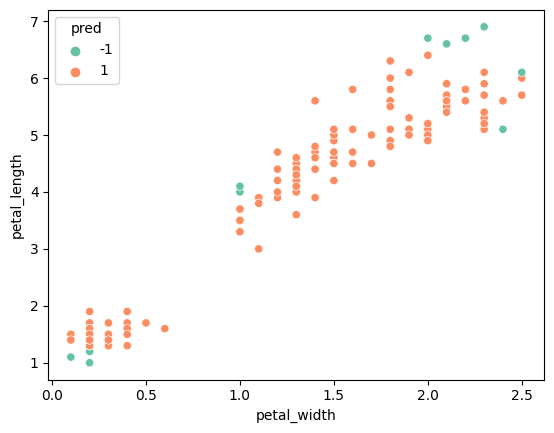

In [38]:
plt.figure()
sns.scatterplot(x=two['petal_width'], y=two['petal_length'], hue=two['pred'], palette='Set2')
plt.show()